# Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\naman\Downloads\jupyter notebook\us-accidents\US_Accidents_March23.csv")
data.drop(['Start_Lat', 'Start_Lng'],axis=1,inplace=True)

# Data Cleaning

## Feature Selection and Engineering

In [3]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# Filling null values...

data["Visibility(mi)"].fillna(data["Visibility(mi)"].mean(),inplace=True)
data["Temperature(F)"].fillna(data["Temperature(F)"].mean(),inplace=True)
data["Pressure(in)"].fillna(data["Pressure(in)"].mean(),inplace=True)

In [36]:
# changing datatype of the column End_Time to extract day,month,year and other details

data['End_Time'] = data['End_Time'].str.replace(r'\.\d+', '', regex=True)
data['End_Time'] = pd.to_datetime(data['End_Time'], format="%Y-%m-%d %H:%M:%S")
data["Year"]=data["End_Time"].dt.year
data['Month']=data['End_Time'].dt.month
data['Day']= data['End_Time'].dt.day
data['Hour']=data['End_Time'].dt.hour
data['Minute']=data['End_Time'].dt.minute
data['Second']=data['End_Time'].dt.second
data["Date"]=data["End_Time"].dt.date
data["Time"]=data["End_Time"].dt.time

In [6]:
# Combining Weather_Condition and Visibility columns...

data["w_v_combined"] =data["Visibility(mi)"].astype(str)+" "+data["Weather_Condition"]

data["w_v_combined"]

0             10.0 Light Rain
1             10.0 Light Rain
2               10.0 Overcast
3           9.0 Mostly Cloudy
4           6.0 Mostly Cloudy
                  ...        
7728389             10.0 Fair
7728390             10.0 Fair
7728391    10.0 Partly Cloudy
7728392             10.0 Fair
7728393              7.0 Fair
Name: w_v_combined, Length: 7728394, dtype: object

In [37]:
data.shape # we have 7.7M records in our dataset

(7728394, 53)

In [8]:
# checking for null values

data.isnull().sum().sort_values(ascending=False)


End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
w_v_combined              173459
Weather_Timestamp         120228
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Nautical_Twilight          23246
Civil_Twilight             23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Year                           0
Railway                        0
Month                          0
Day                            0
Hour                           0
Minute    

WE HAVE MILLIONS OF NULL VALUES IN OUR DATA. SO, WE WILL CONCERN ABOUT IT WHEN WE NEED TO HAVE AND WHEN WE'LL BE WORKING ON THE DATA WITH NULL VALUES

In [9]:
# Checking for the data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 51 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             object        
 4   End_Time               datetime64[ns]
 5   End_Lat                float64       
 6   End_Lng                float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      object        
 18  Temperature(F)        

ALL THE COLUMNS HAVE THE DESIRED AND ACCURATE DATATYPE

In [10]:
# Checking for duplicates

duplicates=data[data.duplicated(keep="first")]
print(duplicates)

Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight, Year, Month, Day, Hour, Minute, Second, w_v_combined]
Index: []

[0 rows x 51 columns]


DATA HAS NO DUPLICATE VALUES

## UNIVARIATE ANALYSIS

In [11]:
# Summary statistics of the data

data.describe()

,Severity,End_Time,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Day,Hour,Minute,Second
count,7.728394e+06,7728394,4.325632e+06,4.325632e+06,7.728394e+06,7.728394e+06,5.729375e+06,7.554250e+06,7.728394e+06,7.728394e+06,7.157161e+06,5.524808e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06
mean,2.212384e+00,2020-06-04 11:47:48.023066880,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03,2.019909e+03,6.704709e+00,1.575033e+01,1.303476e+01,2.938971e+01,2.701282e+01
min,1.000000e+00,2016-02-08 06:37:08,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2018-11-23 05:45:20.500000,3.346207e+01,-1.177543e+02,0.000000e+00,5.000000e+01,4.300000e+01,4.800000e+01,2.938000e+01,1.000000e+01,4.600000e+00,0.000000e+00,2.018000e+03,3.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.100000e+01
50%,2.000000e+00,2020-11-11 15:56:29,3.618349e+01,-8.802789e+01,3.000000e-02,6.300000e+01,6.200000e+01,6.700000e+01,2.985000e+01,1.000000e+01,7.000000e+00,0.000000e+00,2.020000e+03,7.000000e+00,1.600000e+01,1.400000e+01,2.900000e+01,2.800000e+01
75%,2.000000e+00,2022-01-20 17:44:40,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00,2.022000e+03,1.000000e+01,2.300000e+01,1.800000e+01,4.400000e+01,4.200000e+01
max,4.000000e+00,2023-03-31 23:59:00,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,2.023000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01
std,4.875313e-01,NaN,5.272905e+00,1.810793e+01,1.776811e+00,1.881102e+01,2.238983e+01,2.282097e+01,9.969900e-01,2.657336e+00,5.424983e+00,1.102246e-01,1.915277e+00,3.641722e+00,8.686556e+00,5.822901e+00,1.730044e+01,1.812925e+01


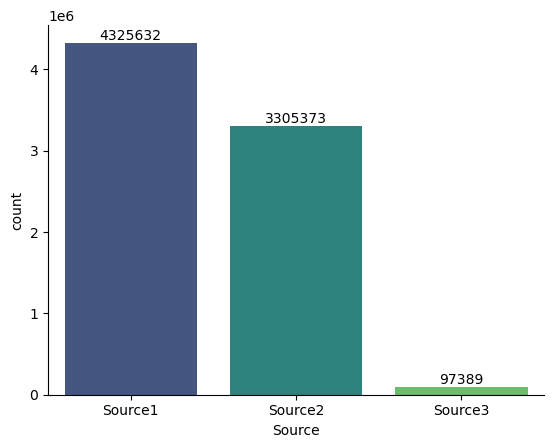

In [11]:
# Row accident data from different sources

row_data_sources=data.Source.value_counts()
sns.barplot(x=row_data_sources.index,y=row_data_sources,palette="viridis")
sns.despine(right=True)
for i,v in enumerate(row_data_sources):
    plt.text(i,v+1,str(v),ha="center",va="bottom")

In [12]:
data.head(10)

,ID,Source,Severity,Start_Time,End_Time,End_Lat,End_Lng,Distance(mi),Description,Street,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Minute,Second,w_v_combined
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,Night,Night,Night,2016,2,8,11,0,0,10.0 Light Rain
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,Night,Night,Day,2016,2,8,6,37,59,10.0 Light Rain
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,Night,Day,Day,2016,2,8,7,19,27,10.0 Overcast
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,Day,Day,Day,2016,2,8,7,53,34,9.0 Mostly Cloudy
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,Day,Day,Day,2016,2,8,8,9,7,6.0 Mostly Cloudy
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,...,Day,Day,Day,2016,2,8,8,14,26,7.0 Light Rain
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,...,Day,Day,Day,2016,2,8,8,29,35,7.0 Overcast
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,...,Day,Day,Day,2016,2,8,8,29,58,7.0 Overcast
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,...,Day,Day,Day,2016,2,8,8,30,40,5.0 Mostly Cloudy
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,...,Day,Day,Day,2016,2,8,8,40,4,3.0 Light Rain


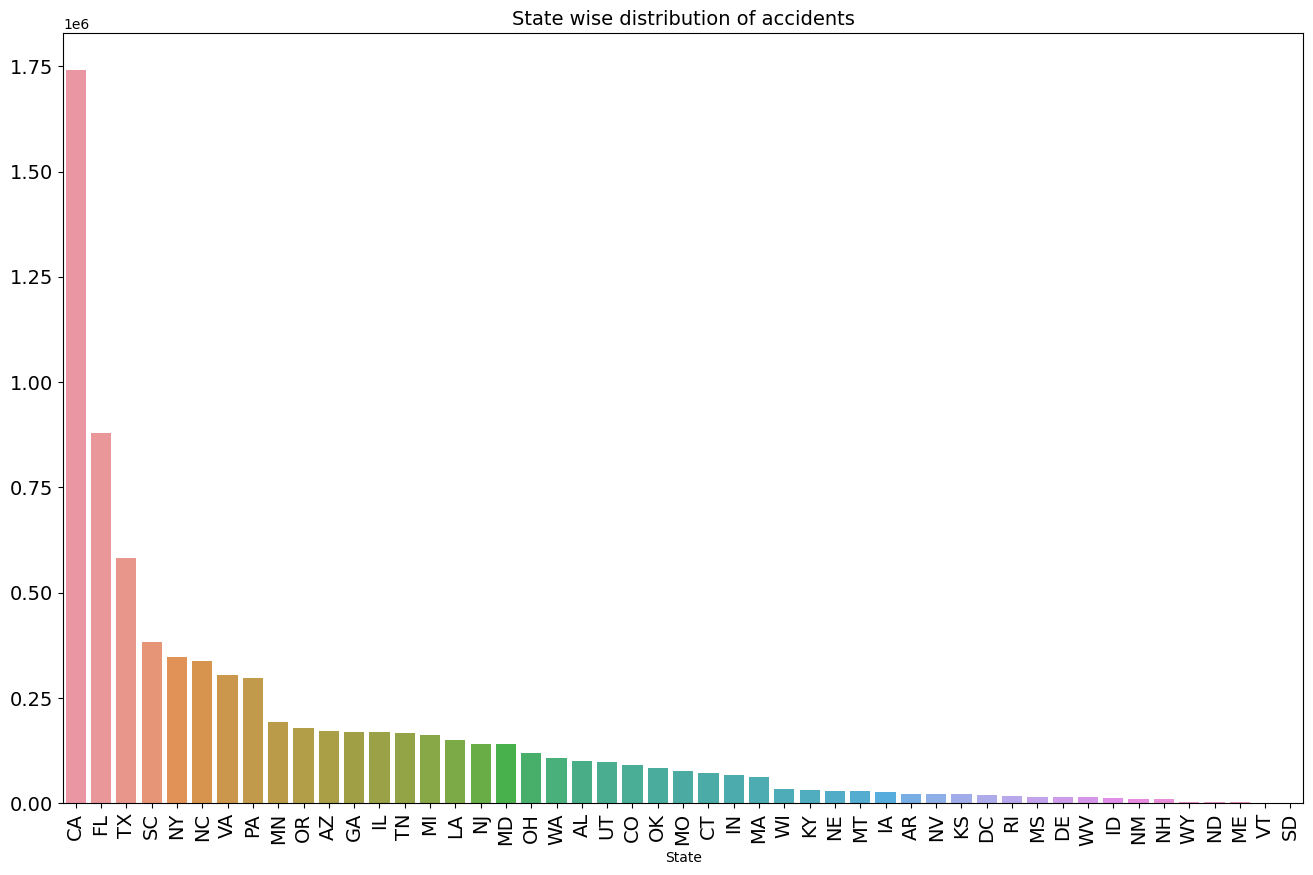

In [80]:
# State wise distribution of accidents

plt.figure(figsize=(16,10))
sns.countplot(data=data,x=data.State,order=['CA', 'FL', 'TX', 'SC', 'NY', 'NC', 'VA', 'PA', 'MN', 'OR', 'AZ', 'GA', 'IL', 'TN', 'MI', 'LA', 'NJ', 'MD', 'OH', 'WA', 'AL', 'UT', 'CO', 'OK', 'MO', 'CT', 'IN', 'MA', 'WI', 'KY', 'NE', 'MT', 'IA', 'AR', 'NV', 'KS', 'DC', 'RI', 'MS', 'DE', 'WV', 'ID', 'NM', 'NH', 'WY', 'ND', 'ME', 'VT', 'SD'])
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.ylabel(None)
plt.title("State wise distribution of accidents",fontsize=14)
plt.show()

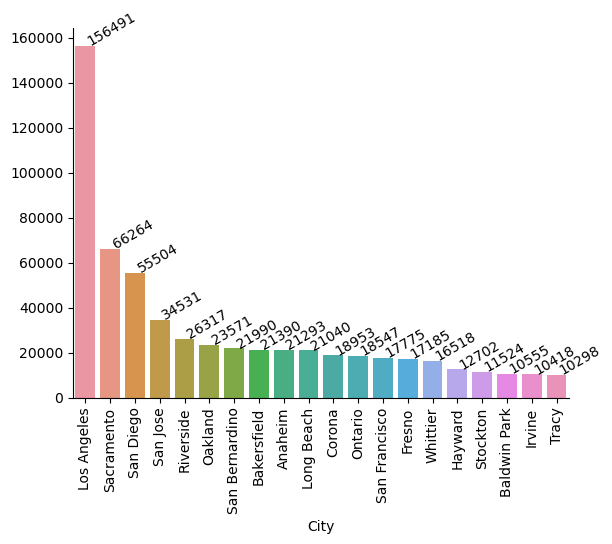

In [34]:
# Top 20 hotspots cities of accidents in california(CA)

CA_data=data[data["State"]=="CA"]
CA_City=CA_data.groupby("City")["City"].count().sort_values(ascending=False).head(20)
sns.barplot(x=CA_City.index,y=CA_City)
sns.despine(right=True)

for i,v in enumerate(CA_City):
    plt.text(i,v+1,str(v),rotation=30)
plt.xticks(rotation=90)
plt.ylabel(None)
plt.show()

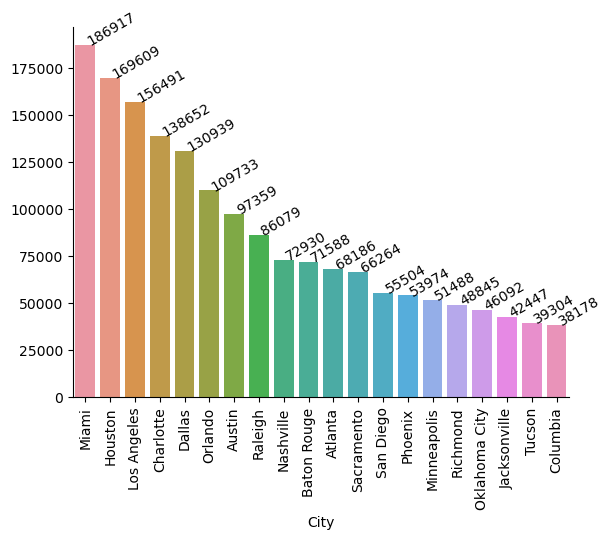

In [33]:
# Top cities with highest number of accidents

city_data=data.groupby("City")["City"].count().sort_values(ascending=False).head(20)
sns.barplot(x=city_data.index,y=city_data)
sns.despine(right=True)

for i,v in enumerate(city_data):
    plt.text(i,v+1,str(v),rotation=30)
plt.xticks(rotation=90)
plt.ylabel(None)
plt.show()

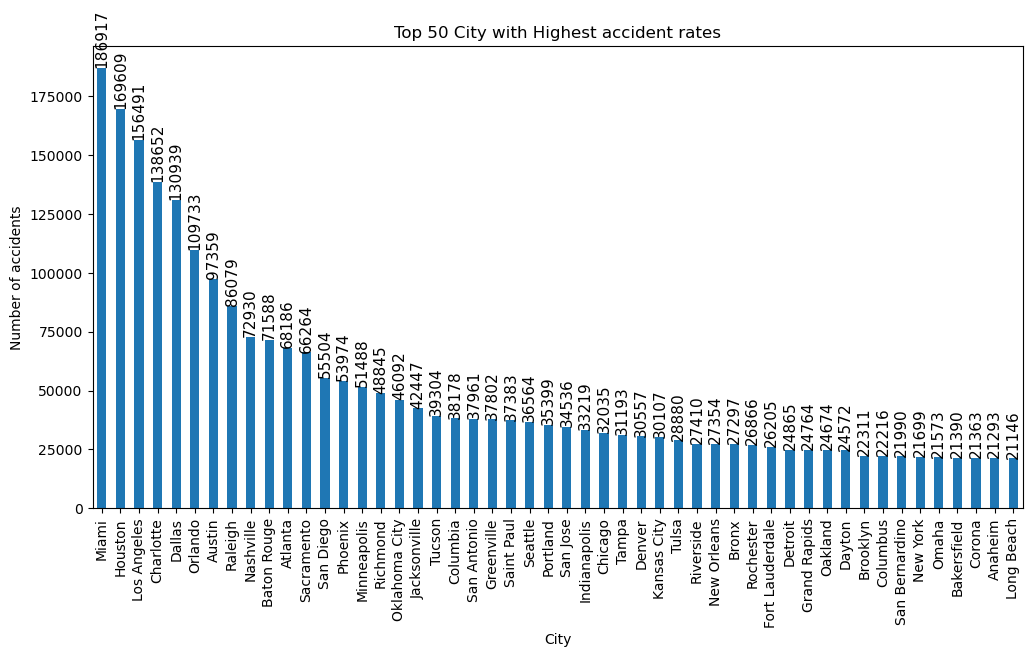

In [14]:
# Top 50 cities with Highest accident rates

plt.figure(figsize=(12,6))
city_wise_groupd=data.groupby("City")["City"].count().sort_values(ascending=False).head(50)
city_wise_groupd.plot(kind="bar")
for i,v in enumerate(city_wise_groupd):
    plt.text(i,v+1,str(v),ha="center",va="bottom",rotation=90,size=11)


plt.ylabel("Number of accidents")
plt.xlabel("City")
plt.title("Top 50 City with Highest accident rates")
plt.xticks(rotation=90)
plt.show()

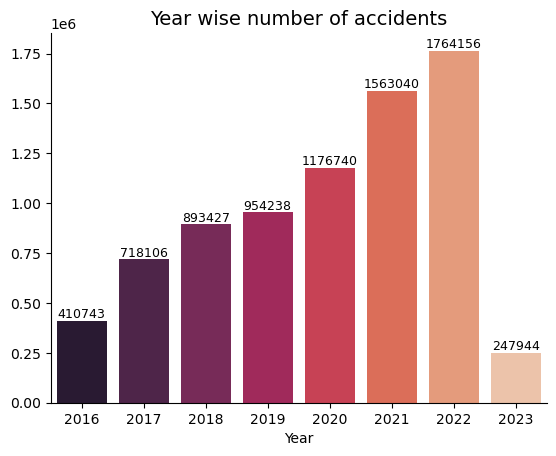

In [15]:
# Year wise number of accidents...

year_data=data.groupby("Year")["ID"].count()
sns.barplot(x=year_data.index,y=year_data,palette="rocket")
sns.despine(right=True)

for i,v in enumerate(year_data):
    plt.text(i,v+1,str(v),ha="center",va="bottom",size=9)
    
plt.ylabel(None)
plt.title("Year wise number of accidents",size=14)
plt.show()

Feb 2016 - Mar 2023 Data


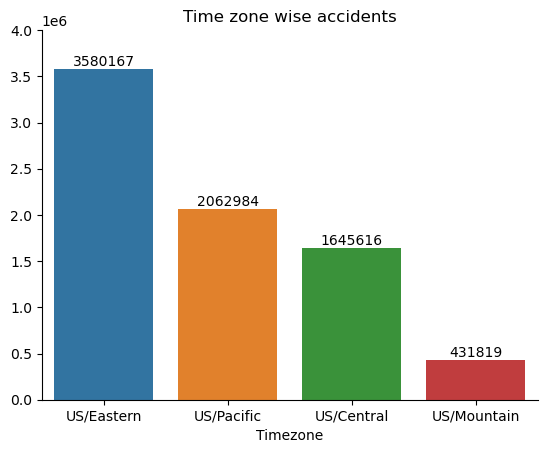

In [16]:
# Time zone wise accidents

nm=data.groupby("Timezone")["Timezone"].count().sort_values(ascending=False)
sns.barplot(x=nm.index,y=nm)
sns.despine(right=True)
plt.ylabel(None)
plt.title("Time zone wise accidents")
plt.ylim([0,4000000])
for i,v in enumerate(nm):
    plt.text(i,v+1,str(v),ha="center",va="bottom")

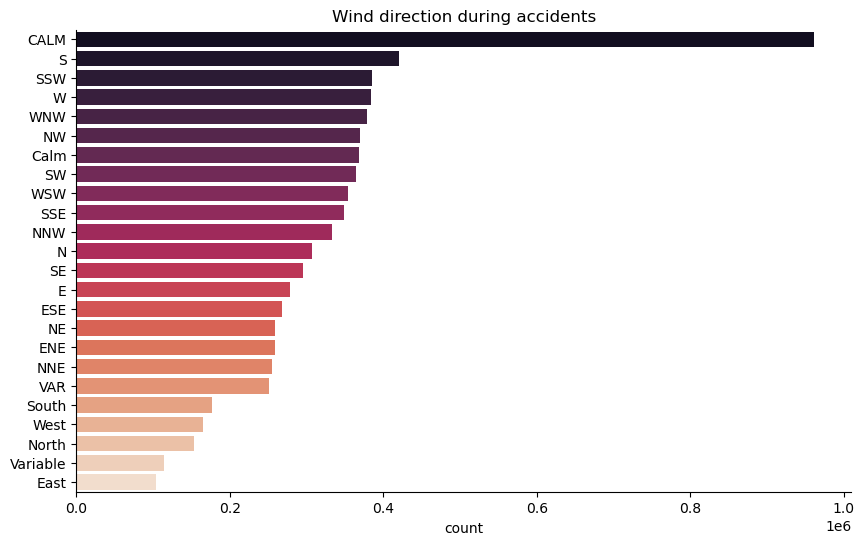

In [17]:
# Wind direction wise distribution of the accidents

plt.figure(figsize=(10,6))
wind_dir=data.Wind_Direction.value_counts().sort_values(ascending=False)
sns.barplot(y=wind_dir.index,x=wind_dir,palette="rocket")
sns.despine(right=True)

plt.ylabel(None)
plt.title("Wind direction during accidents")
plt.show()

MOST OF THE ACCIDENTS OCCURE WHEN THE WIND WAS CALM

Crossing
False    6854631
True      873763
Name: Crossing, dtype: int64


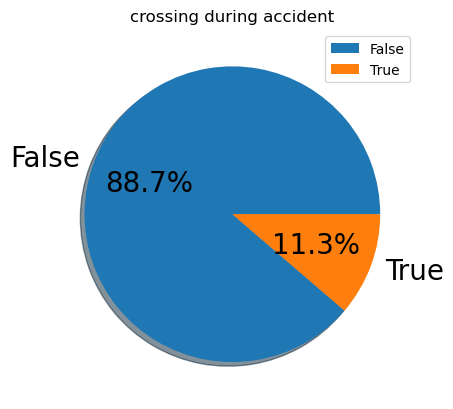

In [18]:
# crossing data distribution

crossing=data.groupby("Crossing")["Crossing"].count()
print(crossing)
plt.pie(crossing,labels=crossing.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.title("crossing during accident")
plt.legend()
plt.show()

Junction
False    7157052
True      571342
Name: Junction, dtype: int64


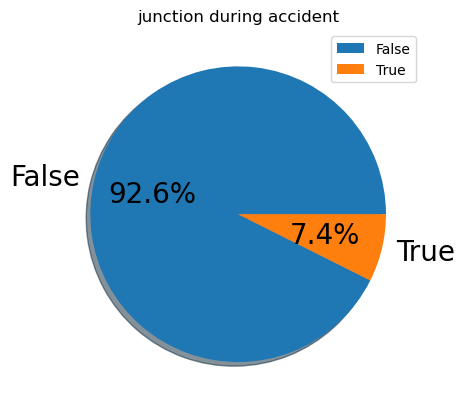

In [19]:
# juntion data distribution

junction=data.groupby("Junction")["Junction"].count()
print(junction)
plt.pie(junction,labels=junction.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.title("junction during accident")
plt.legend()
plt.show()

Station
False    7526493
True      201901
Name: Station, dtype: int64


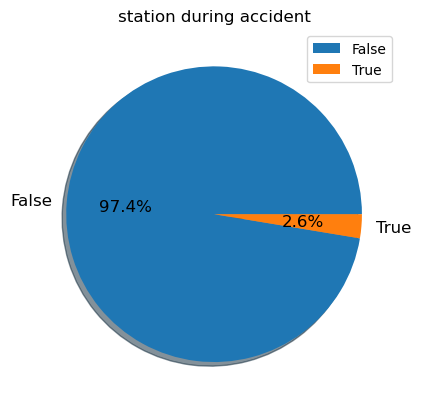

In [20]:
# station data distribution

station=data.groupby("Station")["Station"].count()
print(station)
plt.pie(station,labels=station.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":12})
plt.title("station during accident")
plt.legend()
plt.show()

Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64


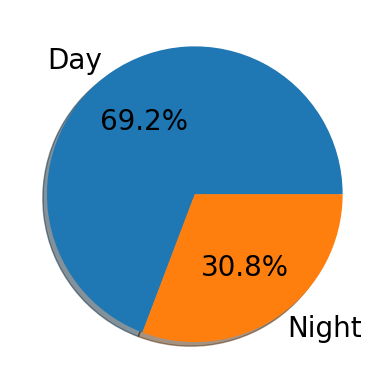

In [21]:
# Accidents day vs night

day_night=data.Sunrise_Sunset.value_counts()
print(day_night)
plt.pie(day_night,labels=day_night.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.show()

Severity
1      67366
2    6156981
3    1299337
4     204710
Name: Severity, dtype: int64


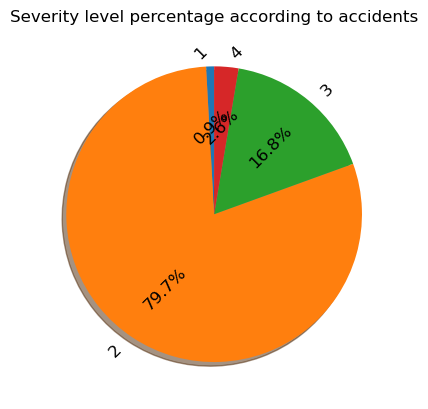

In [22]:
# Percentage of severity levels according to accidents

severity_per=data.groupby("Severity")["Severity"].count()
print(severity_per)
plt.pie(severity_per,labels=severity_per.index,autopct="%1.1f%%",shadow=True,textprops={"size":12,"rotation":45},startangle=90)
plt.title("Severity level percentage according to accidents")
plt.show()


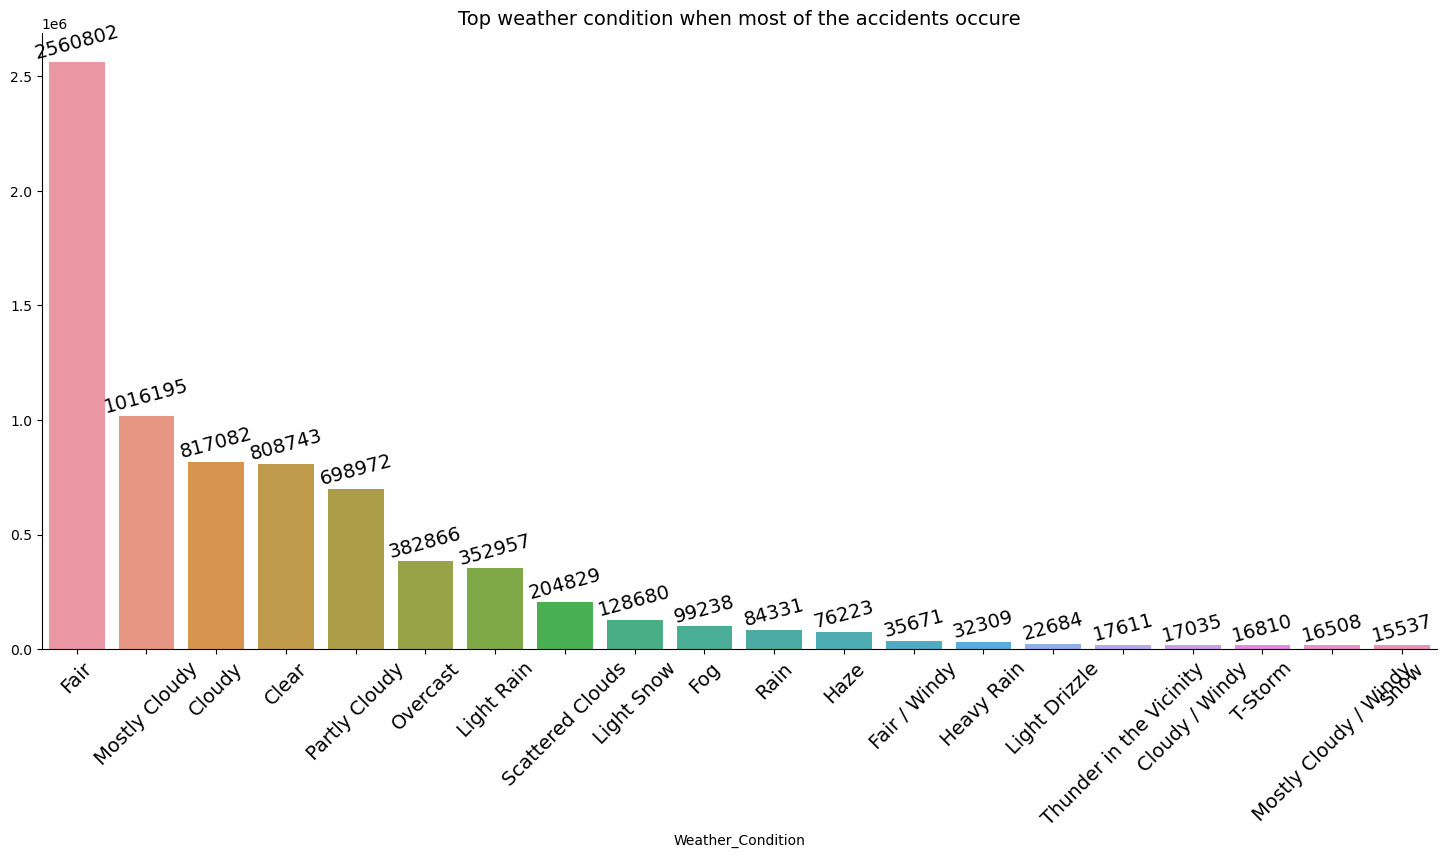

In [23]:
# Top weather condition when most of the accidents occure

plt.figure(figsize=(18,8))
weather_cond=data.groupby("Weather_Condition")["Weather_Condition"].count().sort_values(ascending=False).head(20)
sns.barplot(x=weather_cond.index,y=weather_cond)
sns.despine(right=True)
for i,v in enumerate(weather_cond):
    plt.text(i,v+1,str(v),ha="center",va="bottom",size=14,rotation=15)


plt.xticks(rotation=45,size=14)
plt.ylabel(None)
plt.title("Top weather condition when most of the accidents occure",fontsize=14)
plt.show()

Railway
False    7661415
True       66979
Name: Railway, dtype: int64


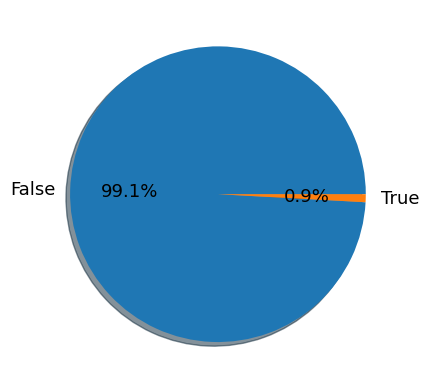

In [24]:
# Railway data distribution

railway=data.groupby("Railway")["Railway"].count()
print(railway)
plt.pie(railway,labels=railway.index,autopct="%1.1f%%",shadow=True,textprops={"size":13})
plt.show()

In [54]:
# average accidents on daily basis

date_wise=data.groupby("Date")["ID"].count()
date_wise.mean()

2967.8932411674346

In [63]:
# average accidents per year

year_data=data.groupby("Year")["ID"].count()
avg_acc=year_data.mean()
print(year_data)
print("average accidents per year: ",f'\033[1m{avg_acc}')

Year
2016     410743
2017     718106
2018     893427
2019     954238
2020    1176740
2021    1563040
2022    1764156
2023     247944
Name: ID, dtype: int64
average accidents per year:  966049.25


## BIVARIATE ANALYSIS

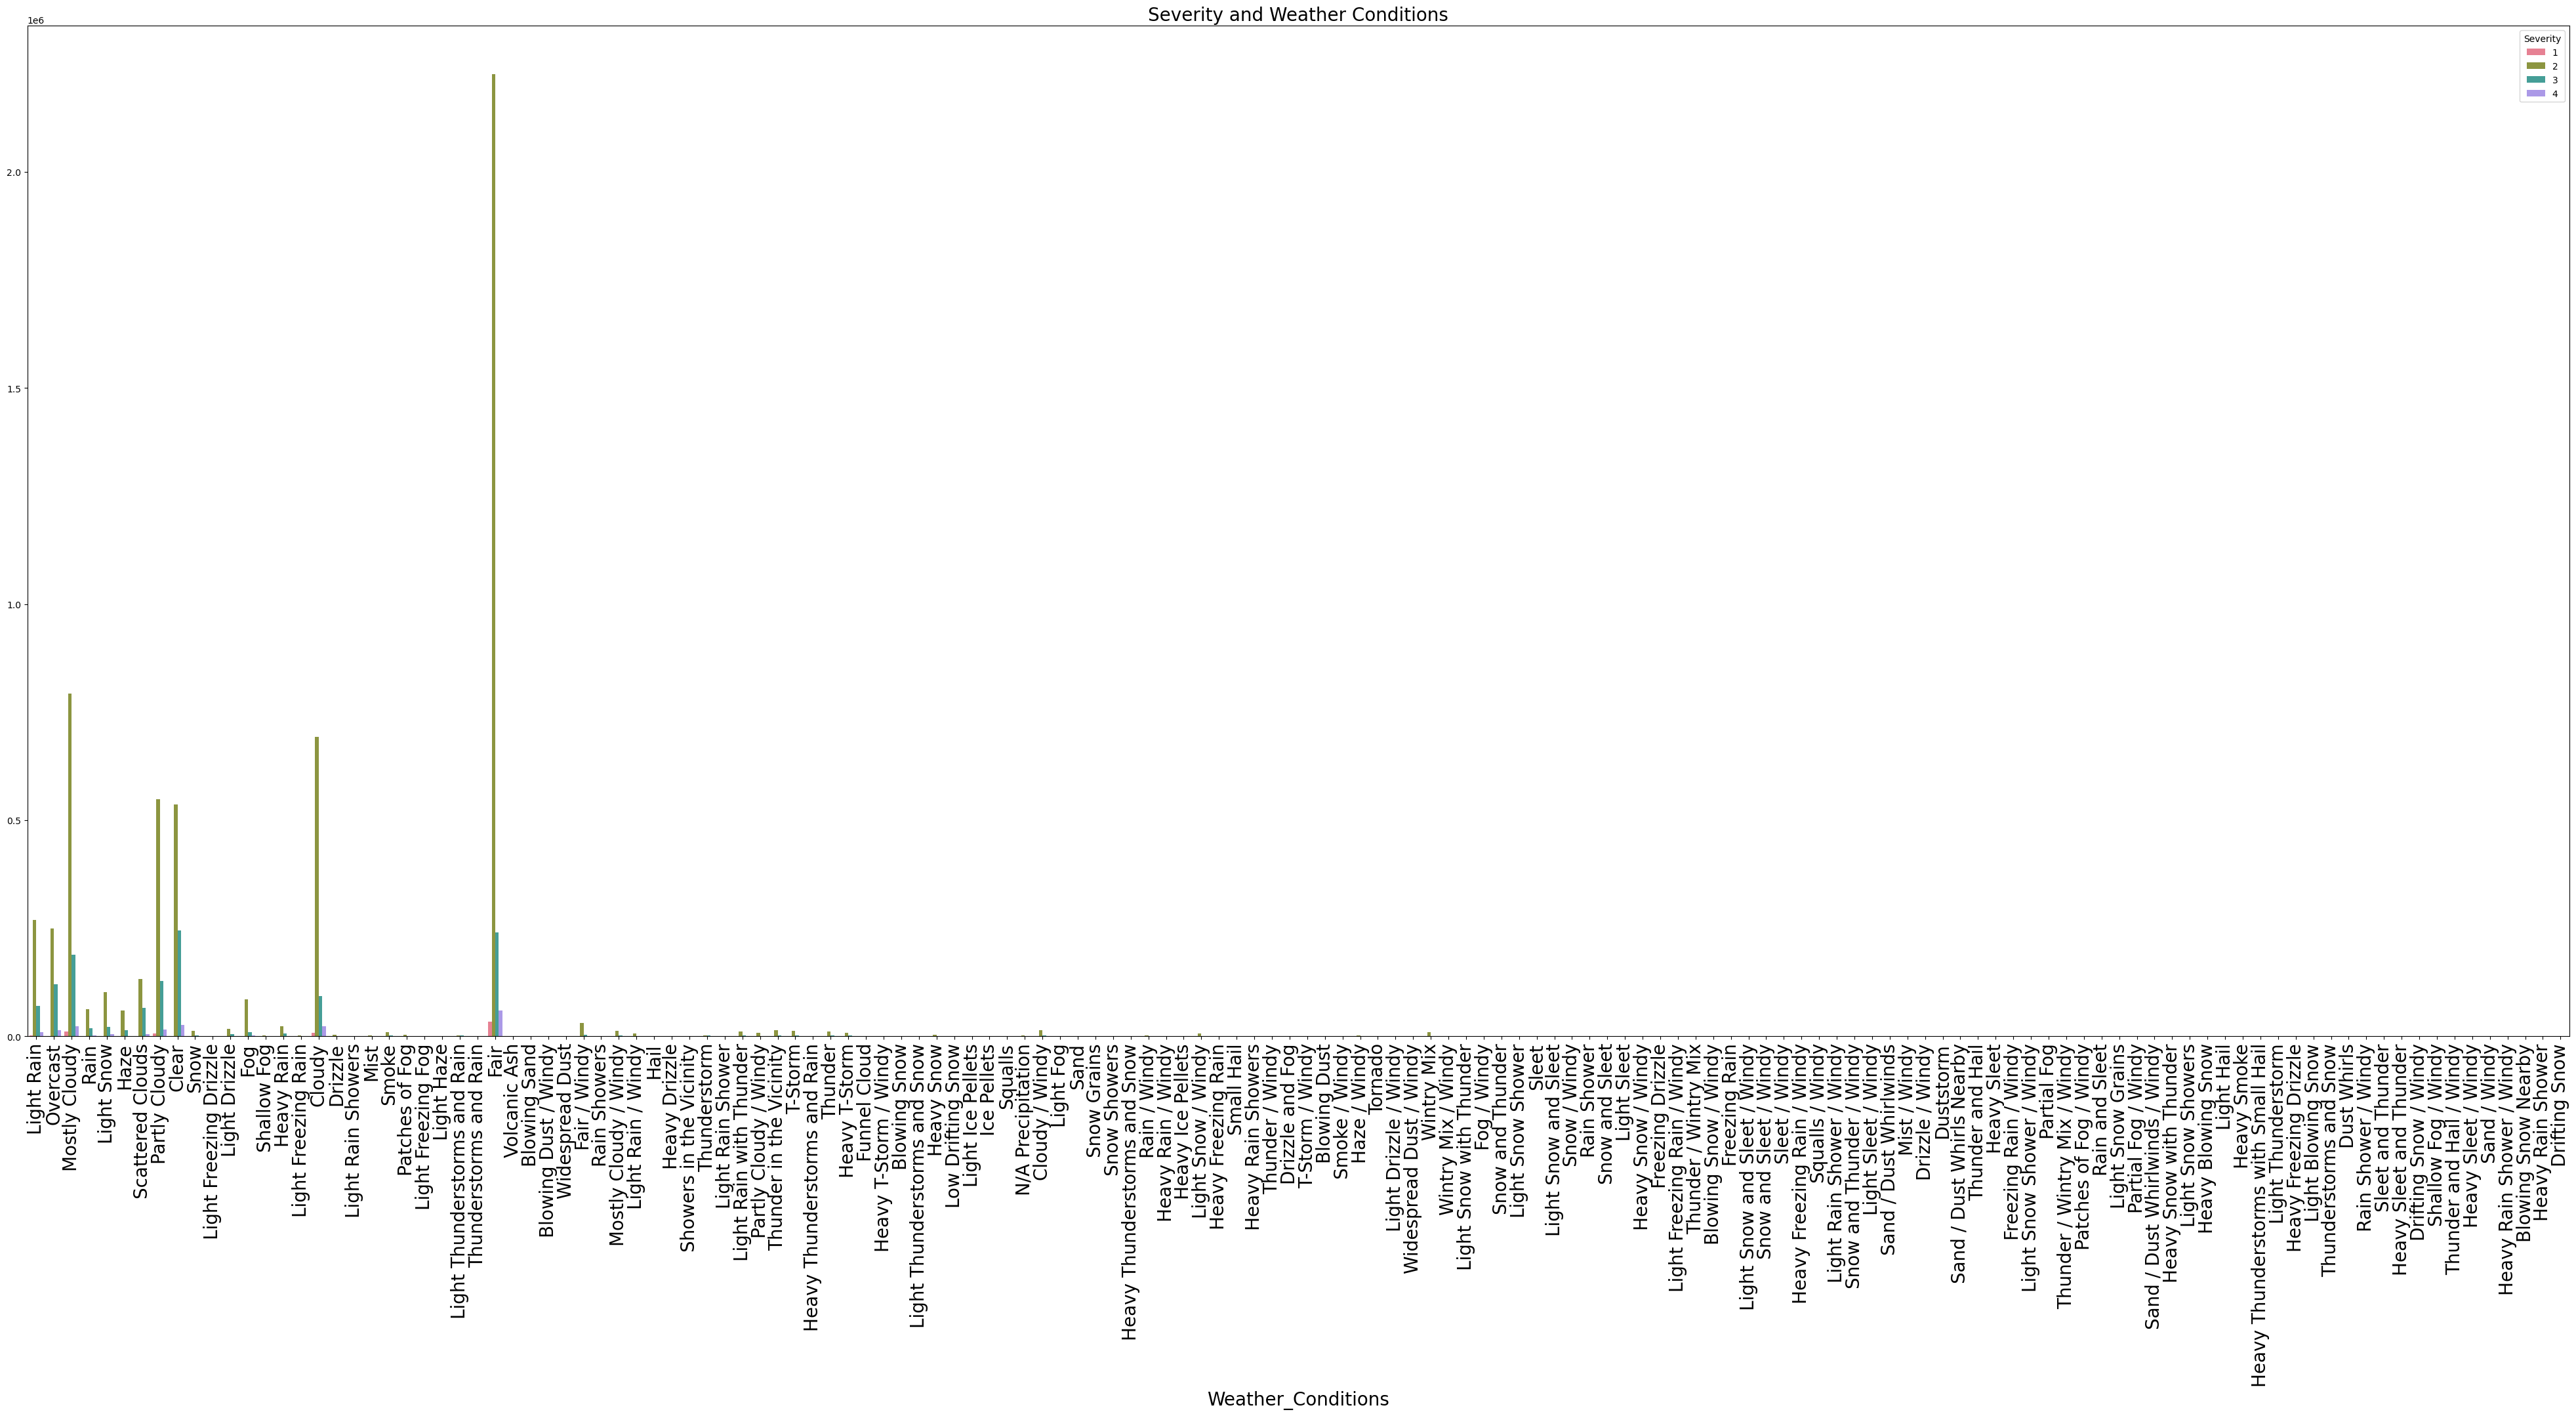

In [81]:
# Severity and Weather Conditions
# Double-Click to zome the chart

plt.figure(figsize=(50,20))
sns.countplot(data=data,x="Weather_Condition",hue="Severity",palette="husl")
plt.xticks(rotation=90,size=20)
plt.xlabel("Weather_Conditions",size=20)
plt.ylabel(None)
plt.title("Severity and Weather Conditions",size=20)
plt.show()

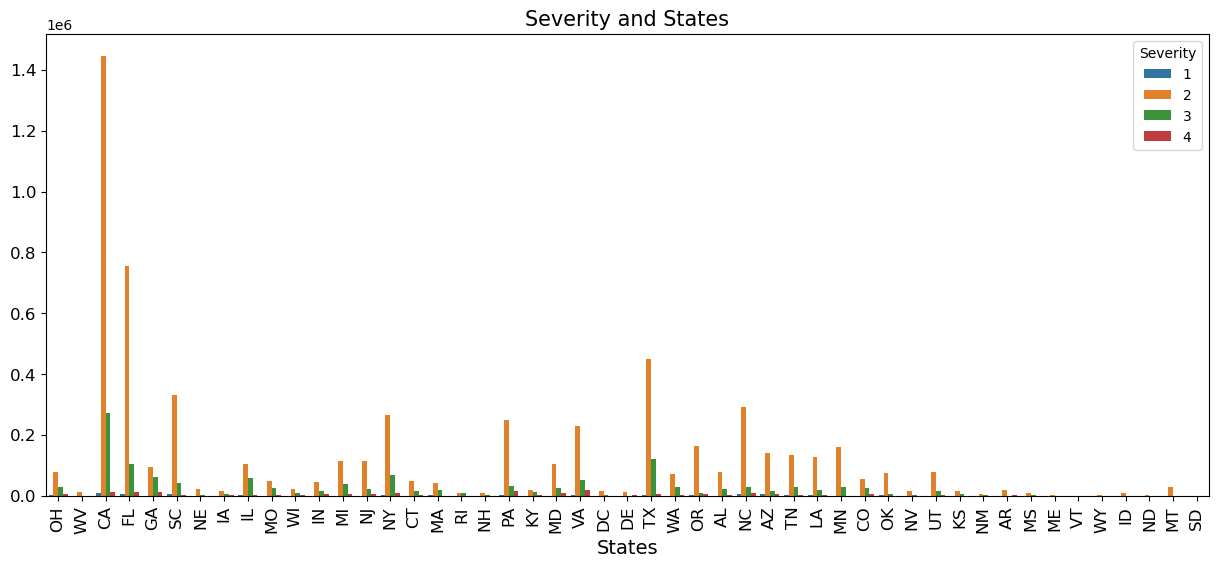

In [26]:
# Severity and States

plt.figure(figsize=(15,6))
sns.countplot(data=data,x="State",hue="Severity")
plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
plt.ylabel(None)
plt.xlabel("States",size=14)
plt.title("Severity and States",size=15)
plt.show()

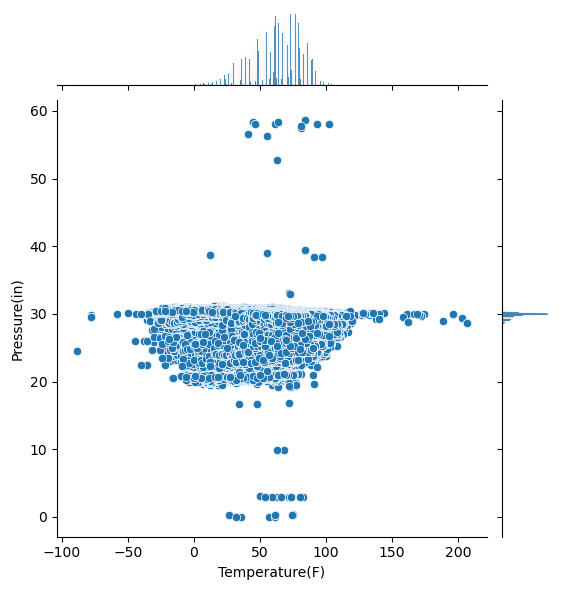

In [82]:
# Temperature and Pressure...

columns=data[["Temperature(F)","Pressure(in)"]]
plot_data=columns[columns.notnull().all(axis=1)]
sns.jointplot(data=plot_data,x="Temperature(F)",y="Pressure(in)")
plt.show()

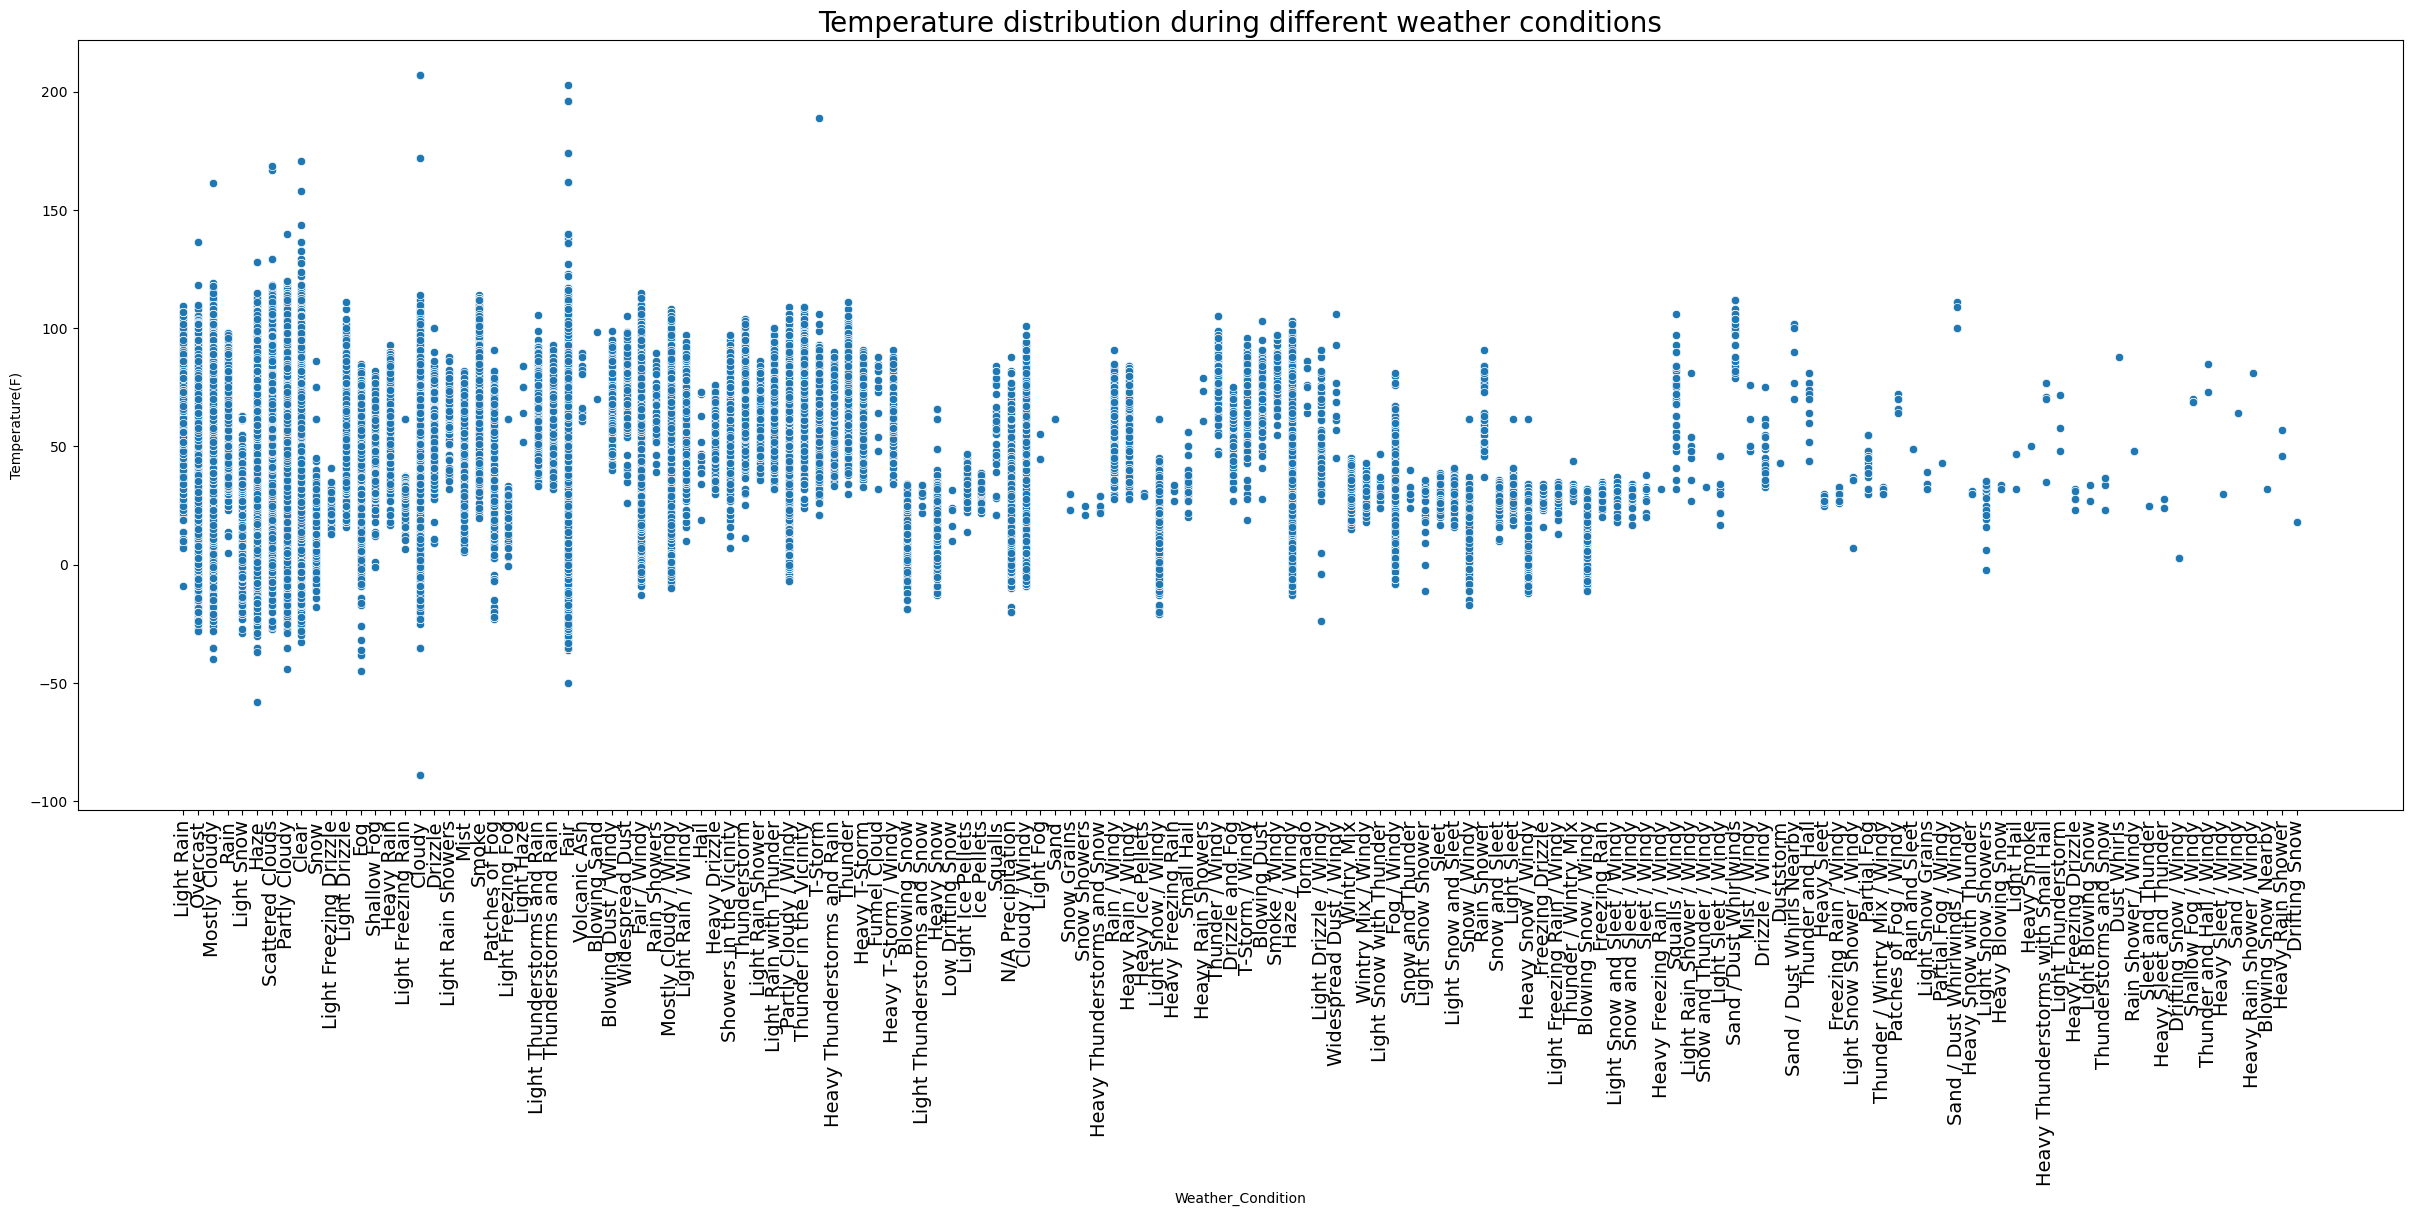

In [83]:
# Temperature distribution during different weather conditions

sns.scatterplot(data,x="Weather_Condition",y="Temperature(F)")
fig = plt.gcf()
fig.set_size_inches(30,10)
plt.xticks(rotation=90,size=14)
plt.title("Temperature distribution during different weather conditions",size=20)
plt.show()

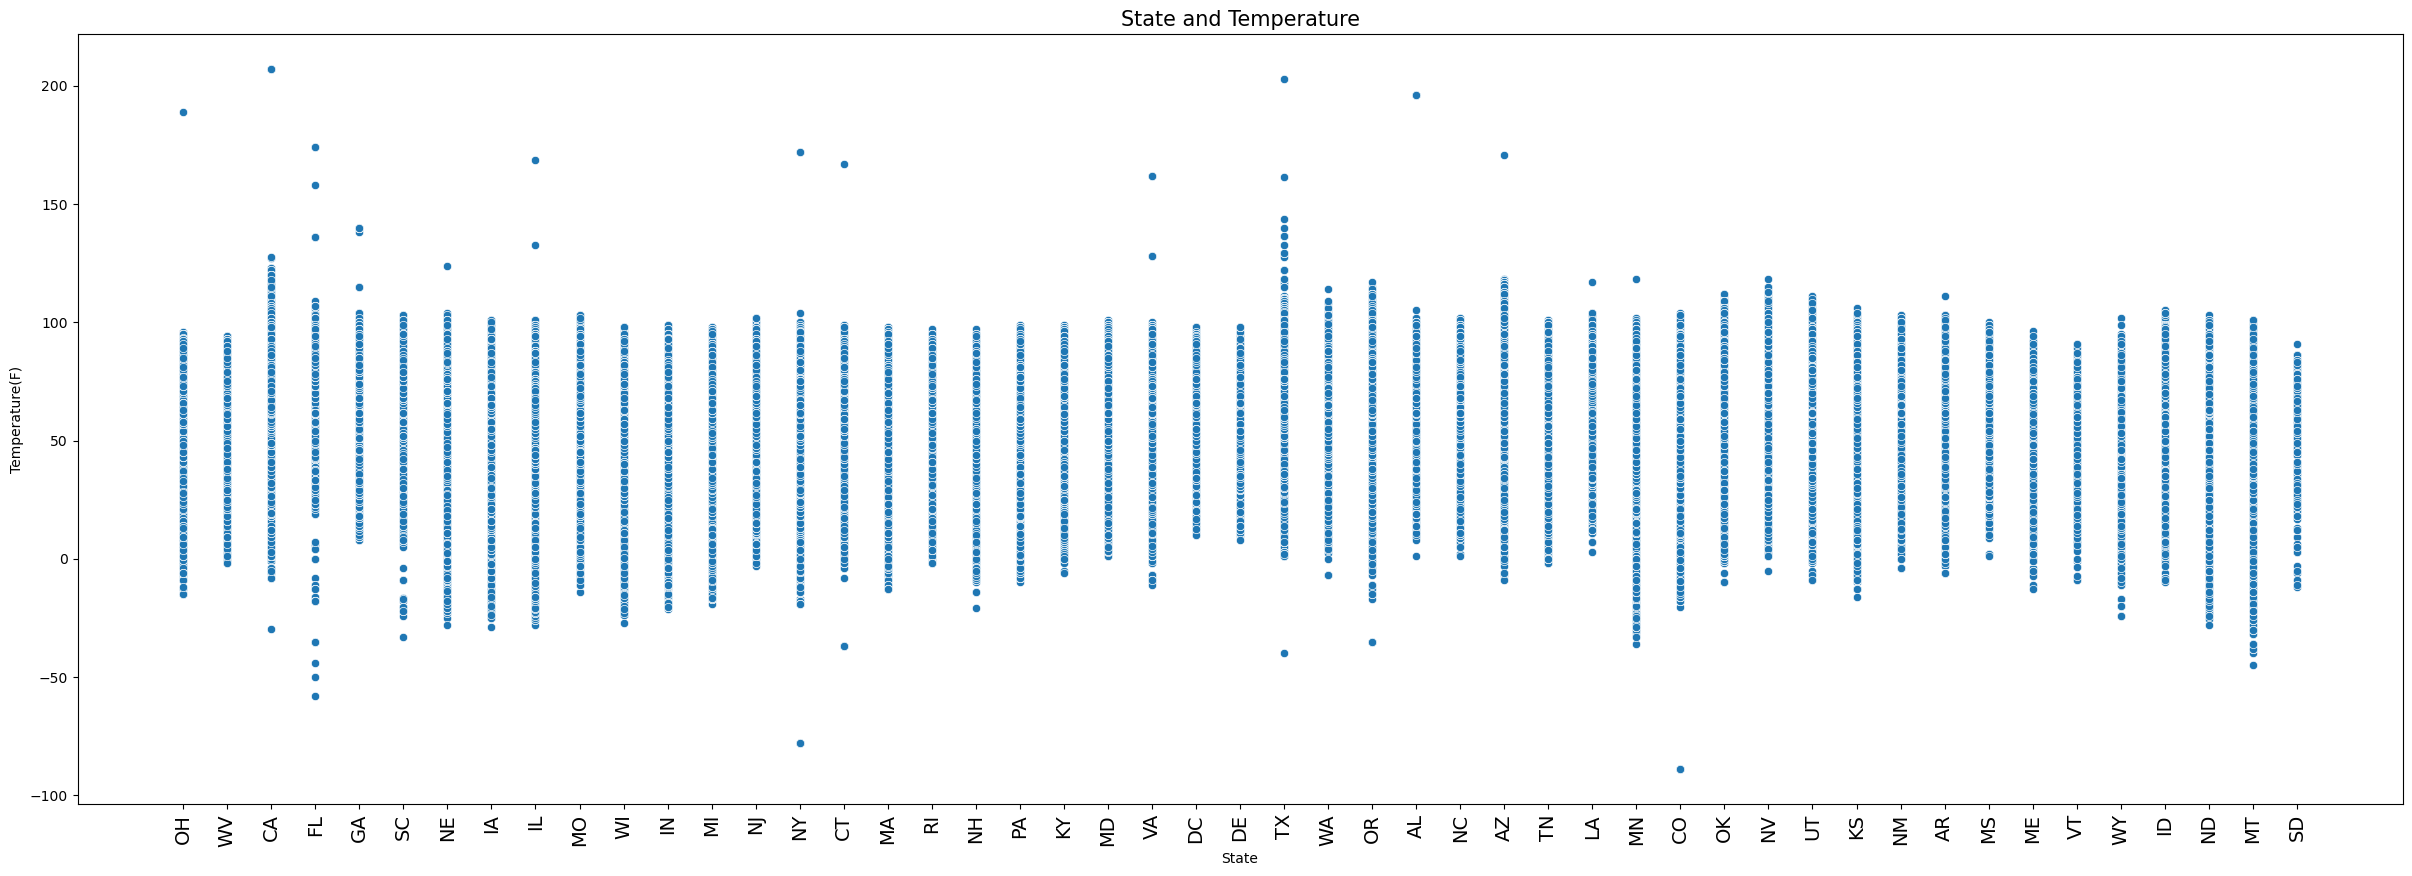

In [84]:
# State and Temperature

sns.scatterplot(data,x="State",y="Temperature(F)")
fig = plt.gcf()
fig.set_size_inches(30,10)
plt.xticks(rotation=90,size=14)
plt.title("State and Temperature",size=15)
plt.show()

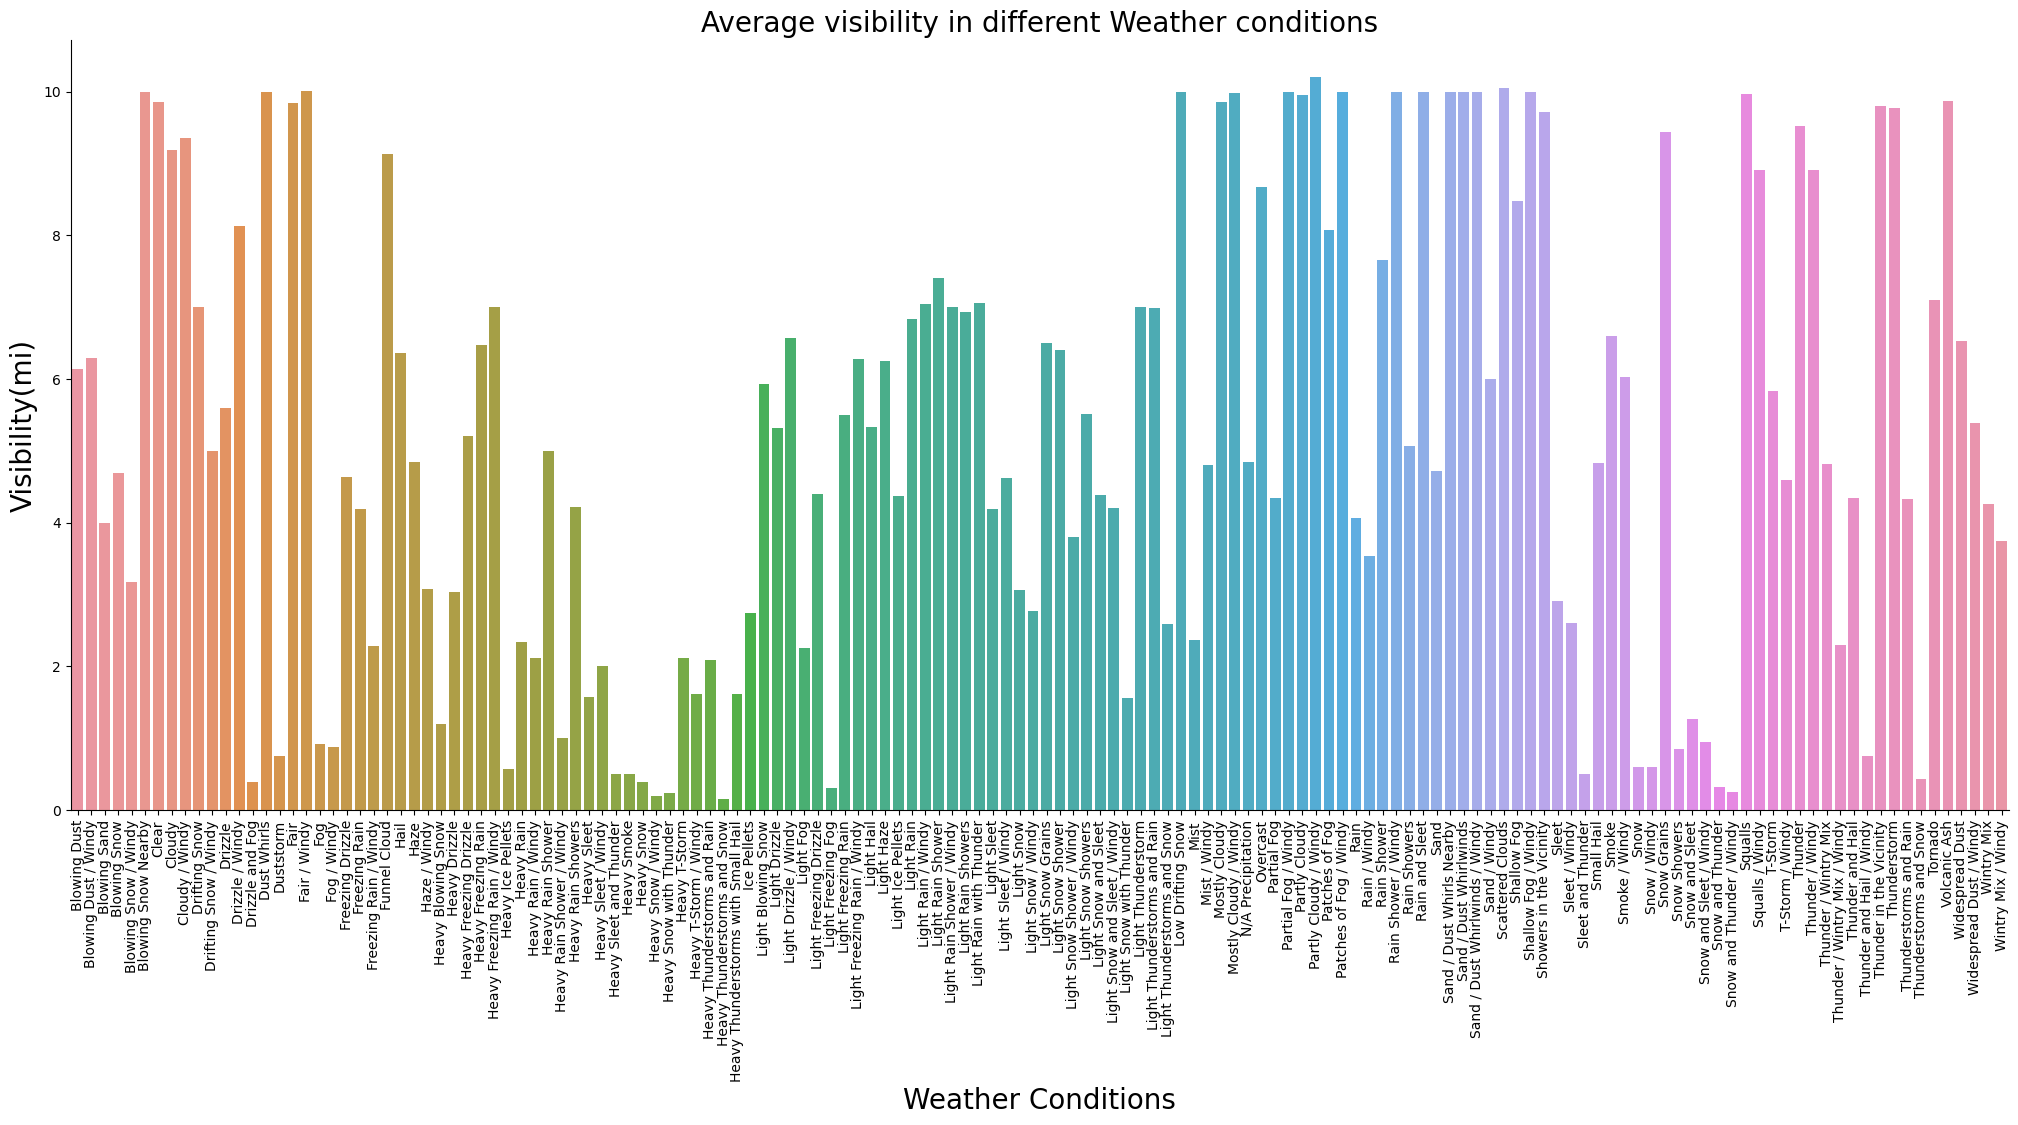

In [85]:
# Average visibility in different Weather conditions
# Double-Click to zoom the chart

plt.figure(figsize=(25,10))
avg_visibility=data.groupby('Weather_Condition')['Visibility(mi)'].mean()
sns.barplot(x=avg_visibility.index,y=avg_visibility)
sns.despine(right=True)

plt.title("Average visibility in different Weather conditions",size=20)
plt.ylabel("Visibility(mi)",size=20)
plt.xlabel("Weather Conditions",size=20)
plt.xticks(rotation=90)
plt.show()

C:\Users\naman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


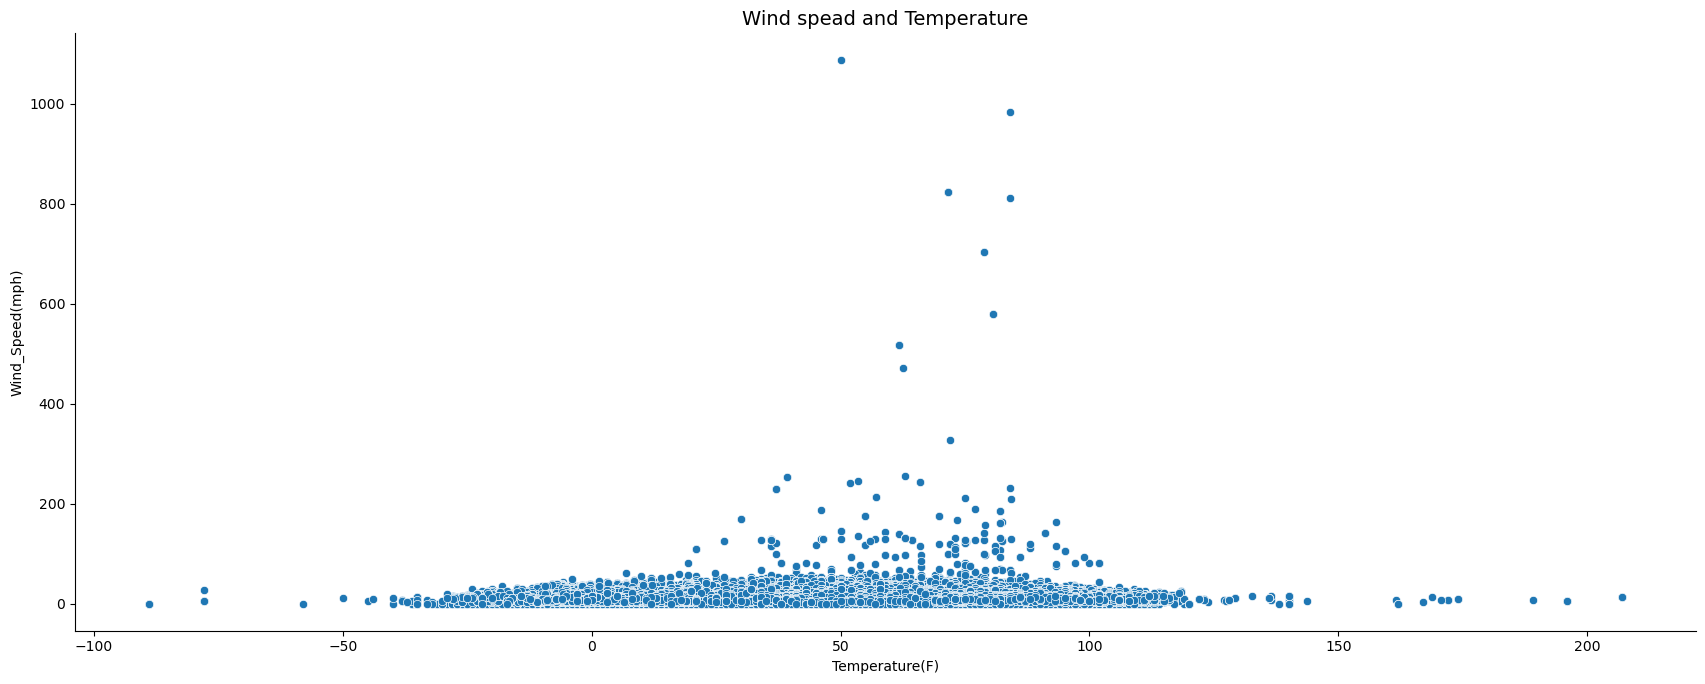

In [86]:
# Wind spead and Temperature

sns.relplot(data,x="Temperature(F)",y="Wind_Speed(mph)")
plt.title("Wind spead and Temperature",size=14)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

C:\Users\naman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


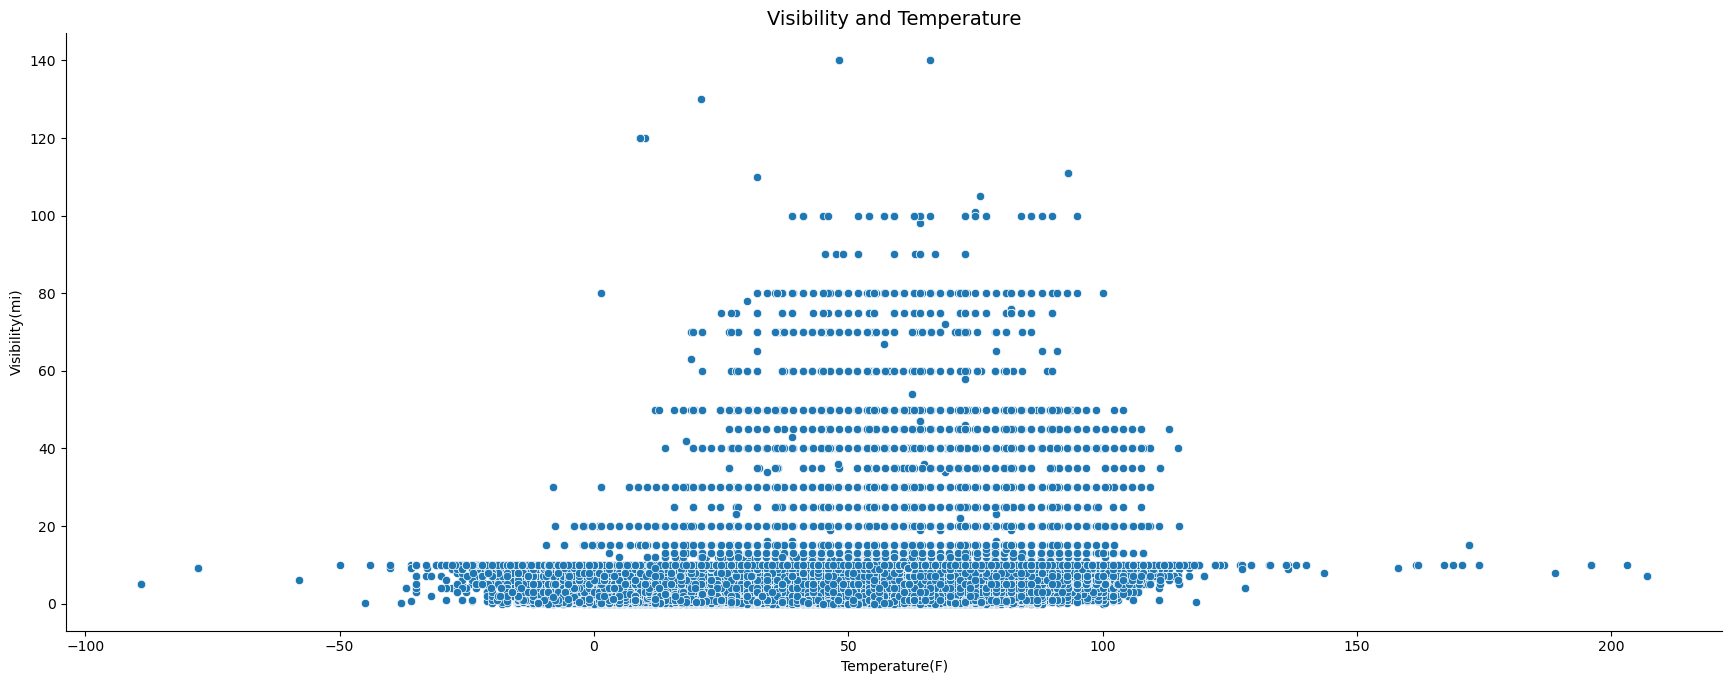

In [87]:
# Visibility and Temperature

sns.relplot(data,x="Temperature(F)",y="Visibility(mi)")
plt.title("Visibility and Temperature",size=14)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

## MULTIVARIAT ANALYSIS

In [88]:
# State vs Weather condition and average Temperature...

cols=data[["State","Weather_Condition","Temperature(F)"]]
not_null_data=cols[cols.notnull().all(axis=1)]
# not_null_data
pivot_table=not_null_data.pivot_table(index="State",columns="Weather_Condition",values="Temperature(F)",aggfunc="mean")
pivot_table

Weather_Condition,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Blowing Snow Nearby,Clear,Cloudy,Cloudy / Windy,Drifting Snow,...,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy
State,,,,,,,,,,,,,,,,,,,,,
AL,NaN,NaN,NaN,33.000000,NaN,NaN,61.128380,61.873421,60.578313,NaN,...,80.030790,82.682576,70.450000,NaN,NaN,NaN,88.000000,NaN,32.000000,NaN
AR,NaN,NaN,NaN,NaN,8.000000,NaN,59.244051,52.070883,53.863636,NaN,...,77.485263,77.000000,60.475000,NaN,NaN,NaN,NaN,NaN,29.306011,28.800000
AZ,89.666667,73.400000,NaN,NaN,NaN,NaN,73.602409,60.818716,63.843750,NaN,...,81.031161,85.234884,69.833333,NaN,NaN,NaN,89.842857,NaN,35.142857,NaN
CA,64.946809,63.022727,84.3,21.800000,NaN,NaN,68.272932,57.424609,51.956123,NaN,...,67.340967,66.272694,58.589655,NaN,NaN,69.87194,56.266667,69.076923,33.339623,32.000000
CO,48.000000,67.937500,NaN,21.286957,16.500000,NaN,48.167308,35.618576,37.944444,NaN,...,71.516129,68.635897,69.200000,NaN,NaN,NaN,NaN,77.000000,28.651316,NaN
CT,NaN,NaN,NaN,NaN,16.000000,NaN,52.601617,51.827767,52.686828,NaN,...,78.126761,80.483333,66.108438,NaN,NaN,NaN,NaN,NaN,31.605932,NaN
DC,NaN,NaN,NaN,NaN,NaN,NaN,47.910345,56.073725,51.568182,NaN,...,81.341463,79.485714,NaN,NaN,NaN,NaN,NaN,NaN,31.076923,NaN
DE,NaN,NaN,NaN,NaN,NaN,NaN,55.328395,55.940037,48.393443,NaN,...,81.971429,75.333333,55.900000,NaN,NaN,NaN,NaN,NaN,31.708333,34.000000
FL,NaN,NaN,NaN,NaN,NaN,NaN,72.178115,71.207760,70.248217,NaN,...,83.522964,83.568772,75.166995,NaN,85.0,84.20000,78.316667,63.000000,37.000000,NaN


I am not abble to make chart for this data because it is very big data and has a lot of unique values. so, i am not able to use that value in our chart for other attributes like hue and col...

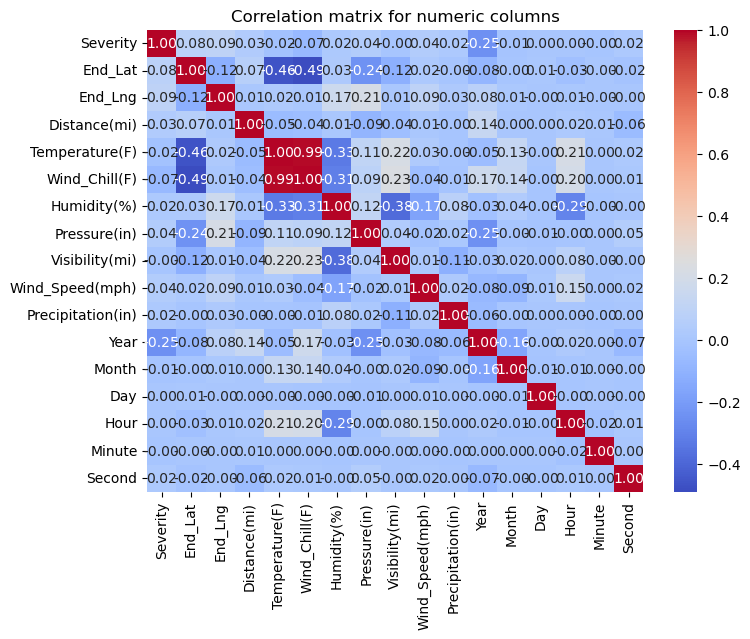

In [20]:
num_cols=data.select_dtypes(include="number").columns.tolist()
num_data=data[['Severity',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Second']]
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
correlation_matrix=num_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for numeric columns")
plt.show()